In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

To generate the data we are going to use the actual value of gravitational acceleration to calculate the correct hight and then add some minor error to the measured times. As such we will simulate the measurements in real life

In [2]:
# data generation
import random

# generating the data using the (0.5 * g * t^2 = h) function. We are also going to add a small error between 0 and 0.1 to the time to this calculation to simulate real measurements
g = 9.8
time = [2,1,0.5,0.8,0.4,0.1,5,7,9,6,3,1.2]
h = 0.5 * g * np.array([(t+ random.random()/10)**2 for t in time]) 
print(h)

[2.01604232e+01 5.35009427e+00 1.33429699e+00 3.17703611e+00
 8.31389241e-01 6.08000863e-02 1.25384875e+02 2.46669462e+02
 4.02083889e+02 1.80598555e+02 4.62811423e+01 7.58891681e+00]


In [3]:
# creating the dataframe

df = pd.DataFrame(data = {'t2':[t**2 for t in time],'h':h})
df

,t2,h
0,4.00,20.160423
1,1.00,5.350094
2,0.25,1.334297
3,0.64,3.177036
4,0.16,0.831389
5,0.01,0.060800
6,25.00,125.384875
7,49.00,246.669462
8,81.00,402.083889
9,36.00,180.598555


In [4]:
# training the model

train,value = df['t2'].values.reshape(-1,1),df['h'].values.reshape(-1,1)
model = LinearRegression()
model.fit(X= train,y = value)

LinearRegression()

In [5]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(train)
print(f'R2 score: {model.score(predictions,value)}')
print(f'MSE: {mean_squared_error(value, predictions)}')

R2 score: -22.642538088218714
MSE: 0.8800282760436966


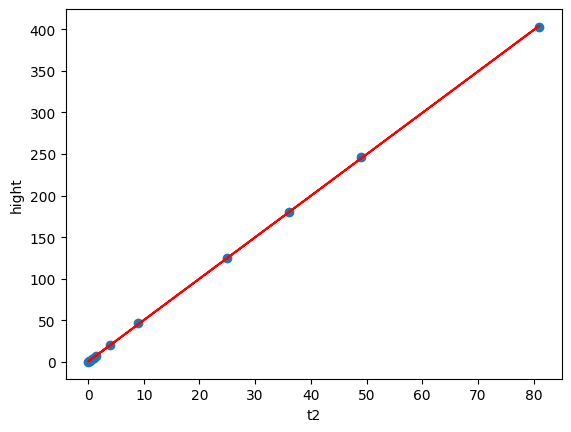

In [6]:
# Plotting the line

plt.xlabel('t2')
plt.ylabel('hight')

plt.scatter(train,value)
plt.plot(train,predictions,color = 'r')

The estimated value of g is the slope of the calculated line times 2

In [7]:
# calculating the slope of the line estimated by the linear regression model

print(f'Slope of the line is {model.coef_}')
print(f'Estimated g: {model.coef_ * 2}')

Slope of the line is [[4.98038249]]
Estimated g: [[9.96076499]]
